# MeanShiftExtractor

Extractor based on SKLearn mean shift algorithm

## Import dependencies

In [1]:
# This is a trick to import from parent directories in Jupyter Notebooks
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from PIL import Image
import numpy as np
import cv2
from sklearn.cluster import MeanShift, estimate_bandwidth

import margo_loader
from ExtractorBaseClass import ExtractorBaseClass
from utils.NotebookRenderPalette import notebook_render_palette
from utils.Formatting import img_arr
from utils.ImageFiles import read_img


## Define MeanShiftExtractor

In [2]:
class MeanShiftExtractor(ExtractorBaseClass):

    def quantize(self):
        
        # Approach from https://github.com/log0/build-your-own-meanshift/blob/master/Meanshift%20Image%20Segmentation.ipynb

        self.image = self.img
        shape = self.image.shape

        pixels = np.reshape(self.image, [-1, shape[2]])
        bandwidth = estimate_bandwidth(pixels, quantile=0.1, n_samples=1000)

        ms = MeanShift(bandwidth=bandwidth, min_bin_freq=6, bin_seeding=True)
        ms.fit(pixels)

        labels = ms.labels_
        cluster_centers = ms.cluster_centers_

        segmented_image = np.reshape(
            img_arr([cluster_centers[l] for l in labels]), shape)  # Just take size, ignore RGB channels.

        return segmented_image

## Demo

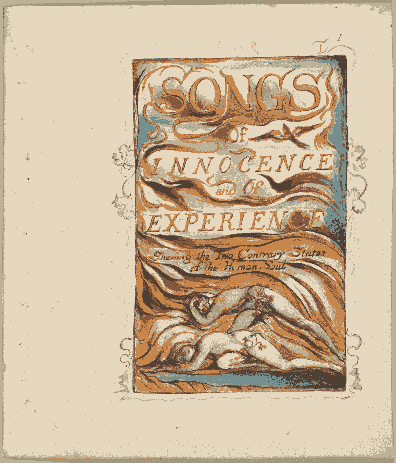

In [3]:
# :: ignore-cell ::
image = read_img("../images/sample.jpg", scale=0.125)
extracted = MeanShiftExtractor(image)
Image.fromarray( extracted.get_color_map())

In [4]:
# :: ignore-cell ::

# Preview the palette

notebook_render_palette(extracted.get_palette())

## Why so few colors?

Unlike other color extraction algorithms, this one tries to guess how many dominant colors there are, rather than taking that as an argument. Because MeanShiftExtractor is a subclass of ExtractorBaseClass, it takes a parameter for color_count, but it ignores it.